In [8]:
# store start time to get execution time of entire script
import time
start_time = time.time()

In [9]:
# helper function for plotting out ground truth curves

import matplotlib.pyplot as plt

def get_ground_truth(data):
    relapsed = data[data.Illicit_Cens5 == 1]
    counts = relapsed['Illicit_Days5'].value_counts()
    counts = counts.to_dict()
    temp = [len(data)] * 365
    labels = list(range(365))
    for i in range(365):
        labels[i] += 1
    total = 0
    errors = []
    for i in range(365):
        try:
            temp[i] = temp[i] - counts[i+1] - total
            total = total + counts[i+1]
        except KeyError:
            errors.append(i)

    for ele in sorted(errors, reverse = False):
        if ele != 0:
            temp[ele] = temp[ele-1]
        else:
             temp[0] = len(data)
    temp = [x / len(data) for x in temp]
    return labels, temp

In [10]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import csv

df = pd.read_csv('data/data_superset.csv')
df.dropna(subset=['murder_numg','hcd'], inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,State,City,agyaddr,xobsyr_0,Illicit_Days5,Illicit_Cens5,female_cd,nonwhite_cd,unemplmt_cd,prsatx_cd,gvsg_cd,CWSg_0_cd,srprobg_cd,dssg_0_cd,epsg_0_cd,adhdg_0_cd,cdsg_0_cd,cjsig_0_cd,lrig_0_cd,srig_0_cd,SESg_0_cd,r4ag_0_cd,nonillicit_flag,primsev_cd_1,primsev_cd_2,primsev_cd_3,primsev_cd_4,primsev_cd_5,primsev_cd_6,B2a_0g,SUDSy_0,SDSl_0,Address,lat,lng,Geo_FIPS,murder_numg,hcd,%_U18g,%_female_householdg,%_unemployedg,%_public_assistanceg,%_povertyg
1,1,1,2,929,OH,Cleveland,1276 West Third St. #400,2006,354,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,2,1,1,0,0,0,0,0,0,3,2,"1276 West Third St. #400, Cleveland, OH",41.501028,-81.697772,39035.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2,2,2,3,951,OH,Cleveland,1276 West Third St. #400,2006,365,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,2,1,0,0,1,0,0,0,0,2,1,"1276 West Third St. #400, Cleveland, OH",41.501028,-81.697772,39035.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
3,3,3,4,1032,OH,Cleveland,1276 West Third St. #400,2006,365,1,0,0,0,0,2,0,1,1,1,1,1,0,2,1,0,2,1,0,0,1,0,0,0,0,2,1,"1276 West Third St. #400, Cleveland, OH",41.501028,-81.697772,39035.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
18,18,18,19,1673,KY,Louisville,1220 Bardstown Rd,2006,365,1,0,0,0,0,0,0,0,0,1,1,0,0,2,2,0,0,1,0,0,1,0,0,0,0,2,2,"1220 Bardstown Rd, Louisville, KY",38.236398,-85.717815,21111.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
21,21,21,22,3870,AZ,Tucson,3130 E Broadway Blvd,2006,5,1,0,0,0,1,2,1,2,2,2,1,2,1,1,2,2,2,1,0,0,1,0,0,0,0,11,7,"3130 E Broadway Blvd, Tucson, AZ",32.221465,-110.926070,4019.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [11]:
df_sub = df[df.SUDSy_0 < 2]
labels_sub, temp_sub = get_ground_truth(df_sub)

In [12]:
df_mild = df[df.SUDSy_0 >= 2]
df_mild = df[df.SUDSy_0 <= 5]
labels_mild, temp_mild = get_ground_truth(df_mild)

In [13]:
df_sev = df[df.SUDSy_0 > 5]
labels_sev, temp_sev = get_ground_truth(df_sev)

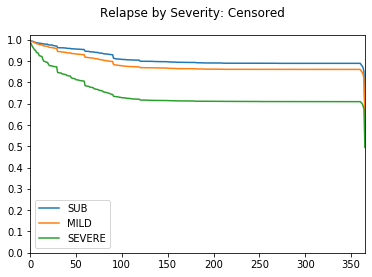

In [14]:
import numpy as np

plt.plot(labels_sub, temp_sub, label='SUB')
plt.plot(labels_mild, temp_mild, label='MILD')
plt.plot(labels_sev, temp_sev, label='SEVERE')

plt.suptitle('Relapse by Severity: Censored')
plt.legend()
plt.xlim(0, 365)
plt.xticks(np.arange(0, 365, step=50))
plt.yticks(np.arange(0, 1.1, step=0.1))
    
plt.show()

In [15]:
# helper functions for displaying table data

import numpy as np
from IPython.display import display_html

# n is the number of columns to display data in
def display_side_by_side(series_obj, n):
    df = pd.DataFrame(series_obj)
    partition = int(round(len(df) / n))
    lower_bound = 0
    upper_bound = partition
    args = []
    for i in range(n):
        args.append(df[lower_bound:upper_bound])
        lower_bound += partition
        upper_bound += partition
    helper(args)

def helper(args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [16]:
# helper function for plotting out ground truth curves

import matplotlib.pyplot as plt

def get_ground_truth(data):
    relapsed = data[data.Illicit_Cens0 == 0]
    counts = relapsed['Illicit_Days0'].value_counts()
    counts = counts.to_dict()
    temp = [len(data)] * 365
    labels = list(range(365))
    for i in range(365):
        labels[i] += 1
    total = 0
    errors = []
    for i in range(365):
        try:
            temp[i] = temp[i] - counts[i+1] - total
            total = total + counts[i+1]
        except KeyError:
            errors.append(i)

    for ele in sorted(errors, reverse = False):
        if ele != 0:
            temp[ele] = temp[ele-1]
        else:
             temp[0] = len(data)
    temp = [x / len(data) for x in temp]
    return labels, temp

In [17]:
# helper function to formulate filename to save graphs

def set_filename(base):
    global INCLUDE_NONILLICIT
    global INCLUDE_MURDER
    global INCLUDE_HCD
    global CONTROL
    
    filename = 'graphs/' + base
    if not INCLUDE_NONILLICIT:
        filename += '_illicit'
    if CONTROL:
        filename += '_control'
    filename += '.png'
    print('saving file to', filename)
    return filename

In [18]:
INCLUDE_NONILLICIT = True

In [19]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import csv

df = pd.read_csv('data/data_superset.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,State,City,agyaddr,xobsyr_0,Illicit_Days5,Illicit_Cens5,female_cd,nonwhite_cd,unemplmt_cd,prsatx_cd,gvsg_cd,CWSg_0_cd,srprobg_cd,dssg_0_cd,epsg_0_cd,adhdg_0_cd,cdsg_0_cd,cjsig_0_cd,lrig_0_cd,srig_0_cd,SESg_0_cd,r4ag_0_cd,nonillicit_flag,primsev_cd_1,primsev_cd_2,primsev_cd_3,primsev_cd_4,primsev_cd_5,primsev_cd_6,B2a_0g,SUDSy_0,SDSl_0,Address,lat,lng,Geo_FIPS,murder_numg,hcd,%_U18g,%_female_householdg,%_unemployedg,%_public_assistanceg,%_povertyg
0,0,0,1,857,OH,Cleveland,1276 West Third St. #400,2005,365,1,0,0,0,0,2,0,0,1,1,1,1,0,1,2,0,1,1,1,0,0,0,0,0,0,0,0,"1276 West Third St. #400, Cleveland, OH",41.501028,-81.697772,39035.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2,929,OH,Cleveland,1276 West Third St. #400,2006,354,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,2,1,1,0,0,0,0,0,0,3,2,"1276 West Third St. #400, Cleveland, OH",41.501028,-81.697772,39035.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2,2,2,3,951,OH,Cleveland,1276 West Third St. #400,2006,365,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,2,1,0,0,1,0,0,0,0,2,1,"1276 West Third St. #400, Cleveland, OH",41.501028,-81.697772,39035.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
3,3,3,4,1032,OH,Cleveland,1276 West Third St. #400,2006,365,1,0,0,0,0,2,0,1,1,1,1,1,0,2,1,0,2,1,0,0,1,0,0,0,0,2,1,"1276 West Third St. #400, Cleveland, OH",41.501028,-81.697772,39035.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
4,4,4,5,1039,OH,Cleveland,1276 West Third St. #400,2004,365,1,0,0,0,0,0,0,0,1,0,0,1,1,2,1,0,2,0,0,1,0,0,0,0,0,0,0,"1276 West Third St. #400, Cleveland, OH",41.501028,-81.697772,39035.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
if INCLUDE_NONILLICIT == False:
    df = df[df.nonillicit_flag == 0] # subset to only the illicit cases
else:
    df.drop(columns=['nonillicit_flag'], inplace=True) # if not used to subset, remove feature since its redundant
df.shape

(21264, 46)

In [21]:
# based on a domain expert (Jordan Davis) suggestions and recursive feature selection
cols_to_use = ['adol', 'nonwhite_cd', 'prsatx_cd', 'gvsg_cd', 'CWSg_0_cd','srprobg_cd', 'dssg_0_cd', 'epsg_0_cd',
               'adhdg_0_cd', 'cdsg_0_cd','cjsig_0_cd', 'srig_0_cd', 'SESg_0_cd', 'r4ag_0_cd','primsev_cd_2',
               'primsev_cd_5', 'primsev_cd_6', 'Illicit_Days0','Illicit_Cens0']

df = df[cols_to_use]
df.shape

KeyError: "['adol', 'Illicit_Cens0', 'Illicit_Days0'] not in index"

In [ ]:
df.head()

Full Population Survival Analysis

In [ ]:
from sklearn.model_selection import train_test_split
from sksurv.util import Surv

predictor_var = 'Illicit_Days0'
censoring_var = 'Illicit_Cens0'

full_data = df.copy()
full_label = full_data[[censoring_var, predictor_var]]
full_data.drop(columns=[censoring_var, predictor_var], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(full_data, full_label, test_size=0.2)
y_train_censored = Surv.from_arrays(y_train[censoring_var].copy(), y_train[predictor_var].copy()) # structured array to ensure censoring of 365 value
y_test_censored = Surv.from_arrays(y_test[censoring_var].copy(), y_test[predictor_var].copy()) # structured array to ensure censoring of 365 value
print(X_train.shape, y_train_censored.shape)
print(X_test.shape, y_test_censored.shape)
print(full_data.shape, full_label.shape)

In [ ]:
%%time
from sksurv.ensemble import GradientBoostingSurvivalAnalysis

gbsa = GradientBoostingSurvivalAnalysis()
gbsa.fit(X_train, y_train_censored)

In [ ]:
%%time
from sksurv.ensemble import RandomSurvivalForest

rsf = RandomSurvivalForest()
rsf.fit(X_train, y_train_censored)

In [ ]:
%%time
from sksurv.linear_model import CoxnetSurvivalAnalysis

# l1_ratio = 1 adjusts model to implement LASSO method for penalties
# fit_baseline_model = True allows us to create survival/hazard plots after model is fit

rcr = CoxnetSurvivalAnalysis(fit_baseline_model=True, l1_ratio=1)
rcr.fit(X_train, y_train_censored)

Full Population Statistics

In [ ]:
# concordance index
scores = {'Model': ['Random Forest Boosted', 'Random Forest', 'Lasso'], 
               'Full_Pop': [gbsa.score(X_test, y_test_censored), rsf.score(X_test, y_test_censored), 
                        rcr.score(X_test, y_test_censored)]}
full_concordance = pd.DataFrame(data=scores)

Adolescent Survival Analysis

In [ ]:
adol_data = df[df.adol == 1]
adol_label = adol_data[[censoring_var, predictor_var]]
adol_data.drop(columns=[censoring_var, predictor_var], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(adol_data, adol_label, test_size=0.2)
y_train_censored = Surv.from_arrays(y_train[censoring_var].copy(), y_train[predictor_var].copy()) # structured array to ensure censoring of 365 value
y_test_censored = Surv.from_arrays(y_test[censoring_var].copy(), y_test[predictor_var].copy()) # structured array to ensure censoring of 365 value
print(X_train.shape, y_train_censored.shape)
print(X_test.shape, y_test_censored.shape)
print(adol_data.shape, adol_label.shape)

In [ ]:
%%time

gbsa = GradientBoostingSurvivalAnalysis()
gbsa.fit(X_train, y_train_censored)

In [ ]:
%%time

rsf = RandomSurvivalForest()
rsf.fit(X_train, y_train_censored)

In [ ]:
%%time

# l1_ratio = 1 adjusts model to implement LASSO method for penalties
# fit_baseline_model = True allows us to create survival/hazard plots after model is fit

rcr = CoxnetSurvivalAnalysis(fit_baseline_model=True, l1_ratio=1)
rcr.fit(X_train, y_train_censored)

Adolescent Statistics

In [ ]:
# feature importances from Lasso
adol_feature_importance_lasso = pd.DataFrame({'Feature':X_train.columns,
                                              'Adol':np.average(rcr.coef_, weights=rcr.alphas_, axis = 1),})
adol_feature_importance_lasso['Adol_abs'] = np.absolute(adol_feature_importance_lasso['Adol'])
adol_feature_importance_lasso = adol_feature_importance_lasso.nlargest(10,['Adol_abs']) # keep top 10 features
display_side_by_side(adol_feature_importance_lasso, 3)

In [ ]:
# feature importances from Boosted Random Forest
adol_feature_importance_rf = pd.DataFrame({'Feature':X_train.columns, 'Adol':gbsa.feature_importances_,})
adol_feature_importance_rf.sort_values(by=['Adol'], ascending=False, inplace=True)
adol_feature_importance_rf = adol_feature_importance_rf.nlargest(10,['Adol']) # keep top 10 features
display_side_by_side(adol_feature_importance_rf, 4)

In [ ]:
# concordance index
scores = {'Model': ['Random Forest Boosted', 'Random Forest', 'Lasso'], 
               'Adol': [gbsa.score(X_test, y_test_censored), rsf.score(X_test, y_test_censored), 
                        rcr.score(X_test, y_test_censored)]}
adol_concordance = pd.DataFrame(data=scores)

Adolescent Survival Curves

In [ ]:
pred_surv_rsf = rsf.predict_survival_function(X_test)
pred_surv_rcr = rcr.predict_survival_function(X_test)

In [ ]:
# display survival plot
plt.suptitle('Survival: Adolescents')
plt.plot(np.mean([person for person in pred_surv_rsf], axis=0), label='RF')
plt.plot(np.mean([person.y for person in pred_surv_rcr], axis=0), label='Lasso')
labels, temp = get_ground_truth(y_test)
plt.plot(labels, temp, label='Ground Truth')
plt.legend()
plt.xlim(0, 365)
plt.xticks(np.arange(0, 365, step=50))
plt.yticks(np.arange(0, 1.1, step=0.1))

fname = set_filename('survival_adol')
    
plt.savefig(fname)
plt.show()

Non-Adolescent Survival Analysis

In [ ]:
non_adol_data = df[df.adol == 0]
non_adol_label = non_adol_data[[censoring_var, predictor_var]]
non_adol_data.drop(columns=[censoring_var, predictor_var], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(non_adol_data, non_adol_label, test_size=0.2)
y_train_censored = Surv.from_arrays(y_train[censoring_var].copy(), y_train[predictor_var].copy()) # structured array to ensure censoring of 365 value
y_test_censored = Surv.from_arrays(y_test[censoring_var].copy(), y_test[predictor_var].copy()) # structured array to ensure censoring of 365 value
print(X_train.shape, y_train_censored.shape)
print(X_test.shape, y_test_censored.shape)
print(non_adol_data.shape, non_adol_label.shape)

In [ ]:
%%time

gbsa = GradientBoostingSurvivalAnalysis()
gbsa.fit(X_train, y_train_censored)

In [ ]:
%%time

rsf = RandomSurvivalForest()
rsf.fit(X_train, y_train_censored)

In [ ]:
%%time

# l1_ratio = 1 adjusts model to implement LASSO method for penalties
# fit_baseline_model = True allows us to create survival/hazard plots after model is fit

rcr = CoxnetSurvivalAnalysis(fit_baseline_model=True, l1_ratio=1)
rcr.fit(X_train, y_train_censored)

Non-Adolescent Statistics

In [ ]:
# feature importances from Lasso
non_adol_feature_importance_lasso = pd.DataFrame({'Feature':X_train.columns, 
                                                  'Non_Adol':np.average(rcr.coef_, weights=rcr.alphas_, axis = 1),})
non_adol_feature_importance_lasso['Non_Adol_abs'] = np.absolute(non_adol_feature_importance_lasso['Non_Adol'])
non_adol_feature_importance_lasso = non_adol_feature_importance_lasso.nlargest(10,['Non_Adol']) # keep top 10 features
display_side_by_side(non_adol_feature_importance_lasso, 3)

In [ ]:
# feature importances from Boosted Random Forest
non_adol_feature_importance_rf = pd.DataFrame({'Feature':X_train.columns, 'Non_Adol':gbsa.feature_importances_,})
non_adol_feature_importance_rf = non_adol_feature_importance_rf.nlargest(10,['Non_Adol']) # keep top 10 features
display_side_by_side(non_adol_feature_importance_rf, 4)

In [ ]:
# concordance index
scores = {'Model': ['Random Forest Boosted', 'Random Forest', 'Lasso'], 
               'Non_Adol': [gbsa.score(X_test, y_test_censored), rsf.score(X_test, y_test_censored), 
                        rcr.score(X_test, y_test_censored)]}
non_adol_concordance = pd.DataFrame(data=scores)

Non-Adolescent Survival Curves

In [ ]:
pred_surv_rsf = rsf.predict_survival_function(X_test)
pred_surv_rcr = rcr.predict_survival_function(X_test)

In [ ]:
# display survival plot
plt.suptitle('Survival: Non-Adolescents')
plt.plot(np.mean([person for person in pred_surv_rsf], axis=0), label='RF')
plt.plot(np.mean([person.y for person in pred_surv_rcr], axis=0), label='Lasso')
labels, temp = get_ground_truth(y_test)
plt.plot(labels, temp, label='Ground Truth')
plt.legend()
plt.xlim(0, 365)
plt.xticks(np.arange(0, 365, step=50))
plt.yticks(np.arange(0, 1.1, step=0.1))

fname = set_filename('survival_non_adol')
    
plt.savefig(fname)
plt.show()

Overall Statistics

In [ ]:
overall_concordance = pd.concat([adol_concordance, non_adol_concordance['Non_Adol'], 
                                 full_concordance['Full_Pop']], axis=1)
pd.DataFrame(data=overall_concordance)

In [ ]:
overall_feature_importance_lasso = pd.merge(adol_feature_importance_lasso, non_adol_feature_importance_lasso,
                                            on='Feature', how='outer')
overall_feature_importance_lasso.fillna(0, inplace=True)
display_side_by_side(overall_feature_importance_lasso, 2)

In [ ]:
overall_feature_importance_rf = pd.merge(adol_feature_importance_rf, non_adol_feature_importance_rf, 
                                         on='Feature', how='outer')
overall_feature_importance_rf.fillna(0, inplace=True)
display_side_by_side(overall_feature_importance_rf, 4)

In [ ]:
# feature importance for lasso across all ages
df = pd.DataFrame({'ADOL': overall_feature_importance_lasso['Adol'].tolist(),
                   'NON ADOL': overall_feature_importance_lasso['Non_Adol'].tolist()},
                  index=overall_feature_importance_lasso['Feature'].tolist())
df.sort_values(by=['ADOL'], ascending=False, inplace=True)
plt.suptitle('Feature Importance: Lasso')
ax = df.plot.bar(rot=50, figsize=(12, 12))
ax.grid()
fig = ax.get_figure()

fname = set_filename('feature_importances_lasso_age')
    
fig.savefig(fname, bbox_inches='tight')

In [ ]:
# feature importance for lasso across all ages
df = pd.DataFrame({'ADOL': overall_feature_importance_rf['Adol'].tolist(),
                   'NON ADOL': overall_feature_importance_rf['Non_Adol'].tolist()},
                  index=overall_feature_importance_rf['Feature'].tolist())
df.sort_values(by=['ADOL'], ascending=False, inplace=True)
plt.suptitle('Feature Importance: Lasso')
ax = df.plot.bar(rot=50, figsize=(12, 12))
ax.grid()
fig = ax.get_figure()

fname = set_filename('feature_importances_rf_age')
    
fig.savefig(fname, bbox_inches='tight')

In [ ]:
# features in top 20-ish of both models across all ages
feature_importance_intersection = np.intersect1d(overall_feature_importance_rf['Feature'], 
                                                 overall_feature_importance_lasso['Feature'])
print('Common Features:', *list(feature_importance_intersection), sep =', ')

In [ ]:
# print out total notebook execution time
total_seconds = int(time.time() - start_time)
minutes = total_seconds // 60
seconds = total_seconds % 60
print("--- " + str(minutes) + " minutes " + str(seconds) + " seconds ---")